In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [32]:
final_df = pd.read_csv("data/final_df.csv")


In [44]:
top_5_crime_values = final_df.groupby("city_state")[["total_crime", "value"]].mean().nlargest(5, "total_crime")
top_5_crime_values_df = final_df[final_df["city_state"].isin(top_5_crime_values.index)]
top_5_crime_values_df = top_5_crime_values_df.groupby(["year", "city_state"])[["total_crime", "value"]].mean().reset_index()
top_5_crime_values_df.head()

,year,city_state,total_crime,value
0,2014,"Chicago, IL",86708.0,310903.472856
1,2014,"Houston, TX",185170.0,216353.880094
2,2014,"Memphis, TN",69109.0,97828.101122
3,2014,"Philadelphia, PA",76679.0,194311.835938
4,2014,"Phoenix, AZ",64304.0,200511.669033


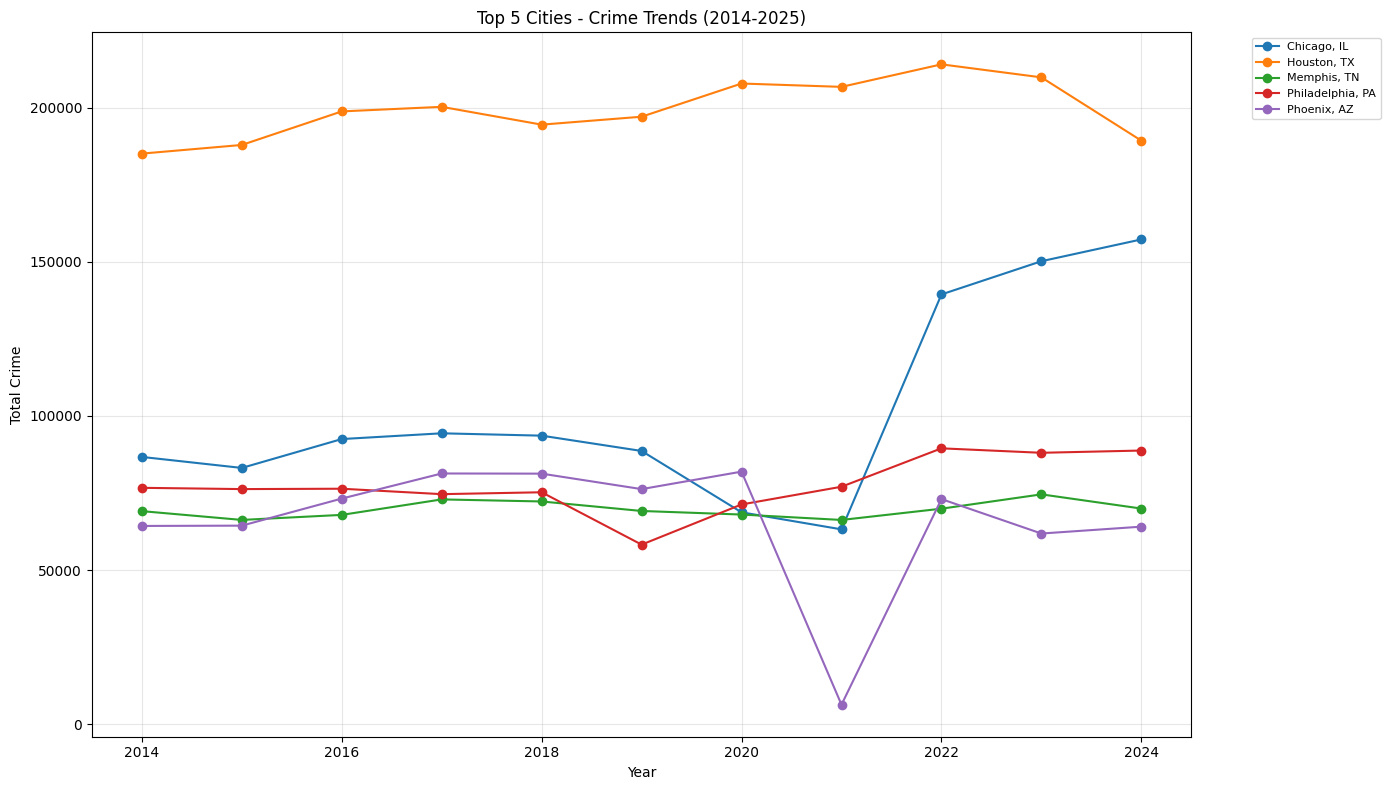

In [48]:
# Line graph showing Top 5 Cities with highest Crime by year
plt.figure(figsize=(14, 8))
for city in top_5_crime_values_df['city_state'].unique():
    city_data = top_5_crime_values_df[top_5_crime_values_df['city_state'] == city]
    plt.plot(city_data['year'], city_data['total_crime'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Top 5 Cities - Crime Trends (2014-2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

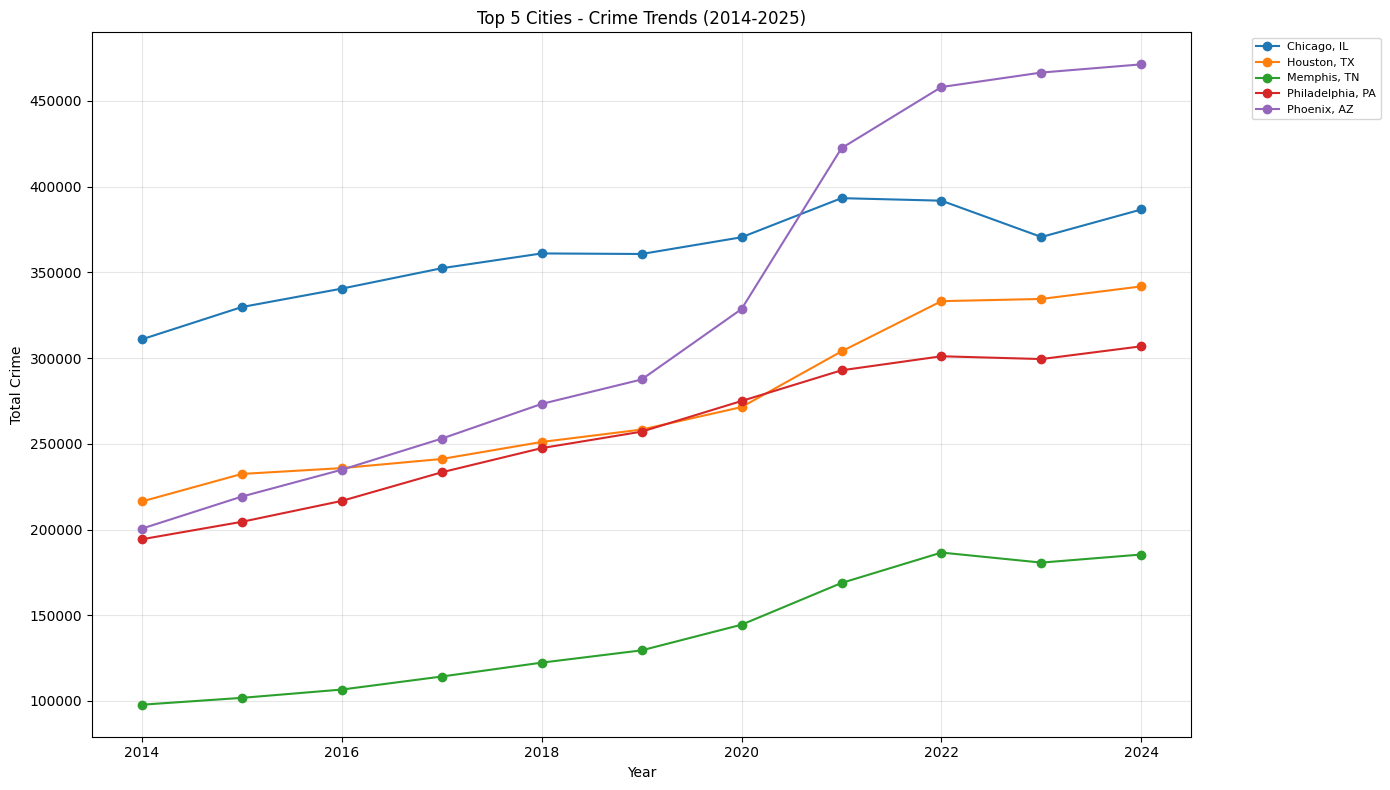

In [47]:
# Line graph showing the home value of Top 5 Cities with Crime by year
plt.figure(figsize=(14, 8))
for city in top_5_crime_values_df['city_state'].unique():
    city_data = top_5_crime_values_df[top_5_crime_df['city_state'] == city]
    plt.plot(city_data['year'], city_data['value'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Top 5 Cities - Crime Trends (2014-2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'marker'

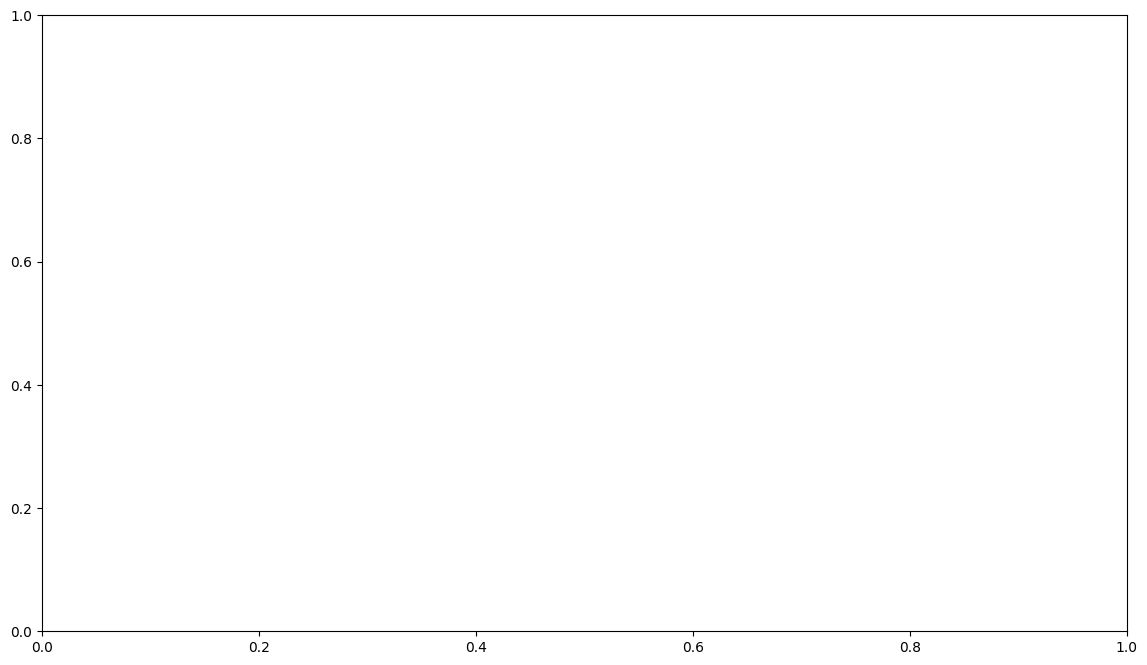

In [54]:
top_5_crime_values_df
plt.figure(figsize=(14, 8))
city_data = top_5_crime_values_df[top_5_crime_values_df.city_state == "Chicago, IL"]
plt.bar(city_data['year'], city_data['value'], marker='o', label=city)
plt.bar(city_data['year'], city_data['total_crime'], marker='o', label=city) 

plt.xlabel('Year')
plt.ylabel('Value / Crime')
plt.title('Chicago, IL House Value and Crime (2014-2024)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [40]:
# Get total_crime data for the same cities and years
top_5_crime_values_combined = final_df[final_df["city_state"].isin(top_5_crime_values.index)].groupby(["year", "city_state"])[["value", "total_crime"]].mean().reset_index()

In [ ]:
city_state["total_incidents"].plot(kind="box")
plt.ylim(0, 500)
plt.title("Total_Incidents Box Plot")